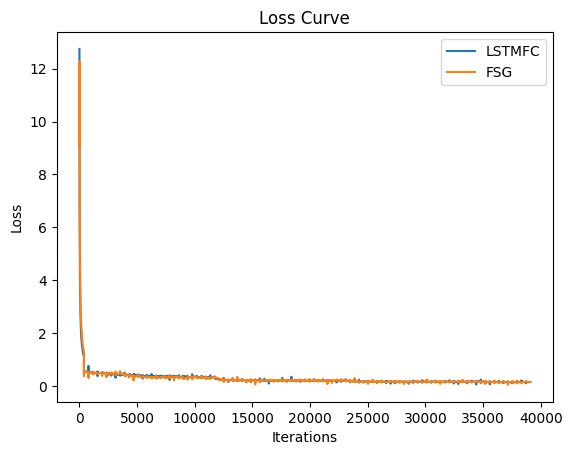

In [1]:
import matplotlib.pyplot as plt

# 读取txt文件
# filename_MultiFC_simple = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-simple-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_MultiFC = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_MetaCNN = "./Results/ResNet32-CIFAR10/runs-Quant/MetaCNN-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_MetaMultiFCBN = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MetaMultiFCBN-Nonlinear-None-hidden-size-100-dorefa-SGD-1bits-lr-30/loss.txt"

lstmfc = './Results/ResNet20-CIFAR10/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-adam-1bits-lr-30-batchsize-100-05-11-03:19:54/loss.txt'

fsg = './Results/ResNet20-CIFAR10/runs-Quant/MetaFastAndSlow-dorefa-adam-1bits-lr-30-batchsize-100-05-11-01:04:52/loss.txt'

def loss_data_pick(filename):
    
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 解析损失值数据
    loss_data = []
    for line in lines:
        line = line.strip()  # 去除首尾空格和换行符
        if line:
            iteration, loss = line.split(', ')
            loss_data.append((int(iteration), float(loss)))

    # 提取迭代次数和损失值
    iterations = [data[0] for data in loss_data]
    loss_values = [data[1] for data in loss_data]
    
    return iterations, loss_values

# iterations_MultiFC_simple, loss_values_MultiFC_simple = loss_data_pick(filename_MultiFC_simple)
# iterations_MultiFC, loss_values_MultiFC = loss_data_pick(filename_MultiFC)
# iterations_MetaCNN, loss_values_MetaCNN = loss_data_pick(filename_MetaCNN)
# iterations_MetaMultiFCBN, loss_values_MetaMultiFCBN = loss_data_pick(filename_MetaMultiFCBN)
iterations_lstmfc, loss_values_lstmfc = loss_data_pick(lstmfc)
iterations_fsg, loss_values_fsg = loss_data_pick(fsg)


# 绘制损失曲线
# plt.plot(iterations_MultiFC_simple, loss_values_MultiFC_simple, label='MultiFC_simple')
# plt.plot(iterations_MultiFC, loss_values_MultiFC, label='Designed_MultiFC')
# plt.plot(iterations_MetaCNN, loss_values_MetaCNN, label='MetaCNN')
# plt.plot(iterations_MetaMultiFCBN, loss_values_MetaMultiFCBN, label='MetaMultiFCBN')
plt.plot(iterations_lstmfc, loss_values_lstmfc, label='LSTMFC')
plt.plot(iterations_fsg, loss_values_fsg, label='FSG')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.savefig('bijiao.pdf')
plt.show()

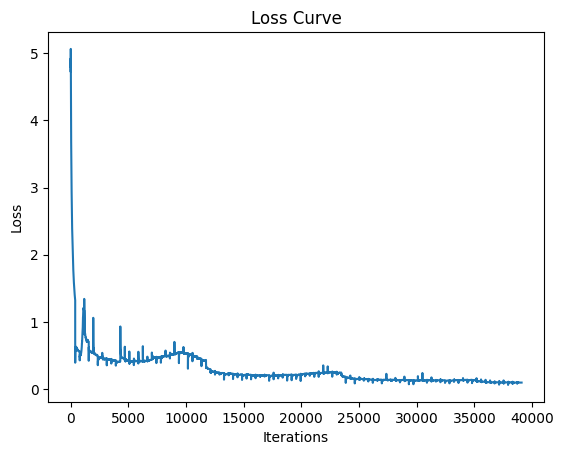

In [3]:
import matplotlib.pyplot as plt

# 读取txt文件
filename = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

with open(filename, 'r') as file:
    lines = file.readlines()

# 解析损失值数据
loss_data = []
for line in lines:
    line = line.strip()  # 去除首尾空格和换行符
    if line:
        iteration, loss = line.split(', ')
        loss_data.append((int(iteration), float(loss)))

# 提取迭代次数和损失值
iterations = [data[0] for data in loss_data]
loss_values = [data[1] for data in loss_data]

# 绘制损失曲线
plt.plot(iterations, loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

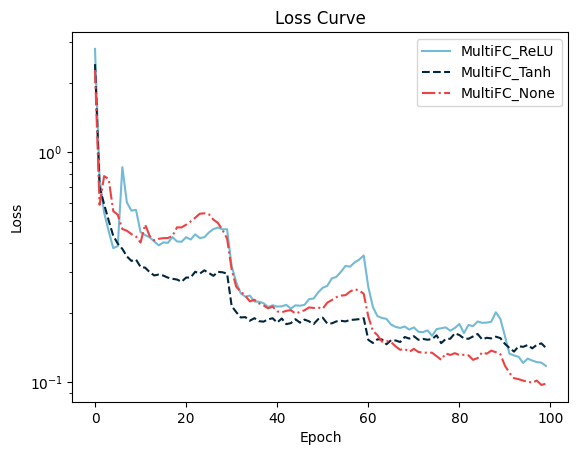

In [4]:
import matplotlib.pyplot as plt

# 读取txt文件
filename_MultiFC_ReLU = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-relu-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

filename_MultiFC_Tanh = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-tanh-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

filename_MultiFC_None = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

def loss_data_pick(filename):
    
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 解析损失值数据
    loss_data = []
    for line in lines:
        line = line.strip()  # 去除首尾空格和换行符
        if line:
            iteration, loss = line.split(', ')
            # loss_data.append((int(iteration), float(loss)))
            loss_data.append(float(loss))

    # 提取迭代次数和损失值
    # iterations = [data[0] for data in loss_data]
    # loss_values = [data[1] for data in loss_data]
    interval = len(loss_data) // 100
    num_intervals = 100
    averages = []
    
    for i in range(num_intervals):
        start = i * interval
        end = start + interval
        interval_data = loss_data[start:end]
        average = sum(interval_data) / interval
        averages.append(average)
    
    iterations = range(num_intervals)
    return iterations, averages

iterations_MultiFC_ReLU, loss_values_MultiFC_ReLU = loss_data_pick(filename_MultiFC_ReLU)
iterations_MultiFC_Tanh, loss_values_MultiFC_Tanh = loss_data_pick(filename_MultiFC_Tanh)
iterations_MultiFC, loss_values_MultiFC = loss_data_pick(filename_MultiFC_None)


# 绘制损失曲线
plt.semilogy(iterations_MultiFC_ReLU, loss_values_MultiFC_ReLU, label='MultiFC_ReLU', color=(115/255,186/255,214/255),linestyle='-')
plt.semilogy(iterations_MultiFC_Tanh, loss_values_MultiFC_Tanh, label='MultiFC_Tanh', color=(2/255,38/255,62/255),linestyle='--')
plt.semilogy(iterations_MultiFC, loss_values_MultiFC, label='MultiFC_None',color=(239/255,65/255,67/255),linestyle='-.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.savefig('activate.pdf')
plt.show()

std deviation:  1.1107472560011706
std deviation:  0.7193860325774402
std deviation:  0.5261991851720649
std lstmfc:  0.029189208845097497
std fsg:  0.011362323091153708
std ste: 0.006578005124751937


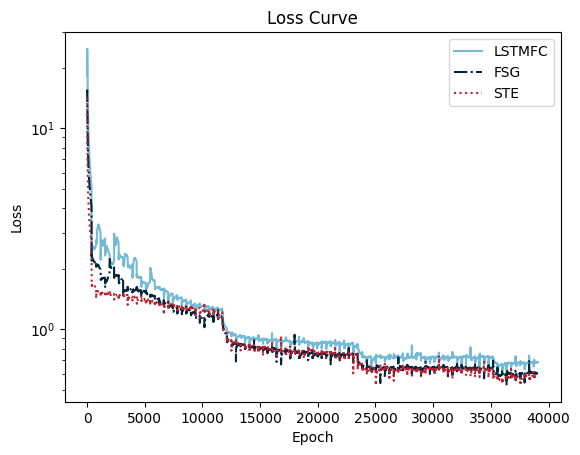

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 读取txt文件
# filename_MultiFC = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_LSTM = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_simple = "./Results/ResNet32-CIFAR10/runs-Quant/MetaSimple-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_CNN = "./Results/ResNet32-CIFAR10/runs-Quant/MetaCNN-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_FCBN = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MetaMultiFCBN-Nonlinear-None-hidden-size-100-dorefa-SGD-1bits-lr-30/loss.txt"

lstmfc = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-adam-1bits-lr-30-batchsize-100-05-16-00:01:26/loss.txt'

fsg = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/MetaFastAndSlow-dorefa-adam-1bits-lr-30-batchsize-100-05-11-18:44:06/loss.txt'

ste = '/root/bqqi/fscil/MetaQuant/resnet56-sgd-loss.log'

# 移动平均平滑函数
def moving_average(data, window_size):
    
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def loss_data_pick(filename):
    
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 解析损失值数据
    loss_data = []
    for line in lines:
        line = line.strip()  # 去除首尾空格和换行符
        if line:
            iteration, loss = line.split(', ')
            # loss_data.append((int(iteration), float(loss)))
            loss_data.append(float(loss))

    print('std deviation: ', np.std(loss_data))
    # 提取迭代次数和损失值
    # iterations = [data[0] for data in loss_data]
    # loss_values = [data[1] for data in loss_data]
    interval = len(loss_data) // 100
    num_intervals = 100
    averages = []
    stds = []
    
    for i in range(1, num_intervals):
        start = i * interval
        end = start + interval
        interval_data = loss_data[start:end]
        average = sum(interval_data) / interval
        std = np.std(interval_data)
        averages.append(average)
        stds.append(std)
    
    iterations = range(1, num_intervals)
    return iterations, averages, stds, loss_data

# epoch_FC, loss_FC = loss_data_pick(filename_MultiFC)
# epoch_LSTM, loss_LSTM = loss_data_pick(filename_LSTM)
# epoch_Simple, loss_Simple = loss_data_pick(filename_simple)
# epoch_CNN, loss_CNN = loss_data_pick(filename_CNN)
# epoch_FCBN, loss_FCBN = loss_data_pick(filename_FCBN)
epoch_lstmfc, loss_lstmfc, stds_lstmfc, loss_data_lstmfc = loss_data_pick(lstmfc)
epoch_fsg, loss_fsg, stds_fsg, loss_data_fsg = loss_data_pick(fsg)
# epoch_ste, loss_ste, stds_ste, loss_data_ste = loss_data_pick(ste)
print('std lstmfc: ', np.std(stds_lstmfc))
print('std fsg: ', np.std(stds_fsg))
# print('std ste:', np.std(stds_ste))

window_size = 10
smoothed_loss_lstmfc = moving_average(loss_data_lstmfc, window_size)
# smoothed_epochs_lstmfc = epoch_lstmfc[:len(smoothed_loss_lstmfc)]
smoothed_epochs_lstmfc = range(len(smoothed_loss_lstmfc))

smoothed_loss_fsg = moving_average(loss_data_fsg, window_size)
# smoothed_epochs_fsg = epoch_fsg[:len(smoothed_loss_fsg)]
smoothed_epochs_fsg = range(len(smoothed_loss_fsg))

# smoothed_loss_ste = moving_average(loss_data_ste, window_size)
# smoothed_epochs_ste = epoch_ste[:len(smoothed_loss_ste)]
# smoothed_epochs_ste = range(len(smoothed_loss_ste))


# 绘制损失曲线
# plt.semilogy(epoch_FC, loss_FC, label='MultiFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_LSTM, loss_LSTM, label='LSTM', color=(2/255,38/255,62/255),linestyle='--')
# plt.semilogy(epoch_Simple, loss_Simple, label='MetaScale',color=(13/255,76/255,109/255),marker='o',markersize=2)
# plt.semilogy(epoch_CNN, loss_CNN, label='MetaCNN',color=(191/255,30/255,46/255),linestyle=':')
# plt.semilogy(epoch_FCBN, loss_FCBN, label='MetaFCBN',color=(239/255,65/255,67/255),linestyle='-.')
# plt.semilogy(epoch_lstmfc, loss_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_fsg, loss_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(epoch_ste, loss_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
# plt.semilogy(epoch_lstmfc, stds_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_fsg, stds_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(epoch_ste, stds_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
plt.semilogy(smoothed_epochs_lstmfc, smoothed_loss_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
plt.semilogy(smoothed_epochs_fsg, smoothed_loss_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(smoothed_epochs_ste, smoothed_loss_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.savefig('structure.pdf')
plt.show()

std deviation:  1.1107472560011706
std deviation:  0.7193860325774402
34
36


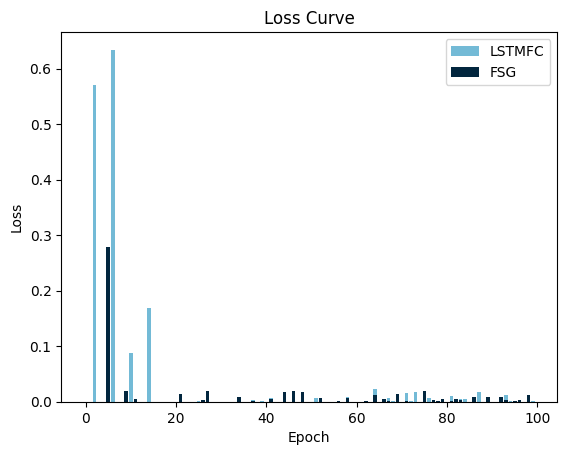

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 读取txt文件
# filename_MultiFC = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MultiFC-Nonlinear-none-hidden-size-100-nfc-3-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_LSTM = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_simple = "./Results/ResNet32-CIFAR10/runs-Quant/MetaSimple-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_CNN = "./Results/ResNet32-CIFAR10/runs-Quant/MetaCNN-dorefa-SGD-1bits-lr-30/loss.txt"

# filename_FCBN = "./Results/ResNet32-CIFAR10/runs-Quant/Meta-MetaMultiFCBN-Nonlinear-None-hidden-size-100-dorefa-SGD-1bits-lr-30/loss.txt"

lstmfc = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-adam-1bits-lr-30-batchsize-100-05-16-00:01:26/loss.txt'

fsg = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/MetaFastAndSlow-dorefa-adam-1bits-lr-30-batchsize-100-05-11-18:44:06/loss.txt'

# ste = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/Baseline-dorefa-optimizer-adam-1bits-lr-30/loss.txt'

# 移动平均平滑函数
def moving_average(data, window_size):
    
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def count_std(data, window_size):
    interval = window_size
    num_intervals = len(data) // interval
    averages = []
    stds = []
    start = 0
    for i in range(len(data)-interval):
        # start = i * interval
        end = start + interval
        interval_data = data[start:end]
        average = sum(interval_data) / interval
        std = np.std(interval_data)
        averages.append(average)
        stds.append(std)
        start += 1
        
    return stds

def loss_data_pick(filename):
    
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 解析损失值数据
    loss_data = []
    for line in lines:
        line = line.strip()  # 去除首尾空格和换行符
        if line:
            iteration, loss = line.split(', ')
            # loss_data.append((int(iteration), float(loss)))
            loss_data.append(float(loss))

    print('std deviation: ', np.std(loss_data))
    # 提取迭代次数和损失值
    # iterations = [data[0] for data in loss_data]
    # loss_values = [data[1] for data in loss_data]
    interval = 391
    num_intervals = len(loss_data) // interval
    averages = []
    stds = []
    
    for i in range(num_intervals):
        start = i * interval
        end = start + interval
        interval_data = loss_data[start:end]
        average = sum(interval_data) / interval
        std = np.std(interval_data)
        averages.append(average)
        stds.append(std)
    
    iterations = range(num_intervals)
    return iterations, averages, stds

def count_diff(data):
    diff_list = []
    for i in range(1, len(data)):
        if data[i] > data[i-1]:
            diff_list.append(data[i] - data[i-1])
        else:
            diff_list.append(0)
    return [0] + diff_list

# epoch_FC, loss_FC = loss_data_pick(filename_MultiFC)
# epoch_LSTM, loss_LSTM = loss_data_pick(filename_LSTM)
# epoch_Simple, loss_Simple = loss_data_pick(filename_simple)
# epoch_CNN, loss_CNN = loss_data_pick(filename_CNN)
# epoch_FCBN, loss_FCBN = loss_data_pick(filename_FCBN)
epoch_lstmfc, loss_lstmfc, stds_lstmfc = loss_data_pick(lstmfc)
epoch_fsg, loss_fsg, stds_fsg = loss_data_pick(fsg)

# std_epoch_lstmfc = count_std(loss_lstmfc, 20)
# std_epoch_fsg = count_std(loss_fsg, 20)
diff_lstmfc = count_diff(loss_lstmfc)
diff_fsg = count_diff(loss_fsg)

non_zero_count_lstmfc = len([item for item in diff_lstmfc if item])
non_zero_count_fsg = len([item for item in diff_fsg if item])
print(non_zero_count_lstmfc)
print(non_zero_count_fsg)


# plt.semilogy(range(len(std_epoch_lstmfc)), std_epoch_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(range(len(std_epoch_fsg)), std_epoch_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
plt.bar(range(len(diff_lstmfc)), diff_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255))
plt.bar(range(len(diff_fsg)), diff_fsg, label='FSG', color=(2/255,38/255,62/255))

# stds_lstmfc[10] = None
# stds_lstmfc[20] = None
# stds_lstmfc[30] = None
# stds_fsg[10] = None
# stds_fsg[20] = None
# stds_fsg[30] = None
# epoch_ste, loss_ste, stds_ste, loss_data_ste = loss_data_pick(ste)
# print('std lstmfc: ', np.std(stds_lstmfc))
# print('std fsg: ', np.std(stds_fsg))
# print('std ste:', np.std(stds_ste))

# window_size = 10
# smoothed_loss_lstmfc = moving_average(loss_data_lstmfc, window_size)
# # smoothed_epochs_lstmfc = epoch_lstmfc[:len(smoothed_loss_lstmfc)]
# smoothed_epochs_lstmfc = range(len(smoothed_loss_lstmfc))

# smoothed_loss_fsg = moving_average(loss_data_fsg, window_size)
# # smoothed_epochs_fsg = epoch_fsg[:len(smoothed_loss_fsg)]
# smoothed_epochs_fsg = range(len(smoothed_loss_fsg))

# smoothed_loss_ste = moving_average(loss_data_ste, window_size)
# smoothed_epochs_ste = epoch_ste[:len(smoothed_loss_ste)]
# smoothed_epochs_ste = range(len(smoothed_loss_ste))


# 绘制损失曲线
# plt.semilogy(epoch_FC, loss_FC, label='MultiFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_LSTM, loss_LSTM, label='LSTM', color=(2/255,38/255,62/255),linestyle='--')
# plt.semilogy(epoch_Simple, loss_Simple, label='MetaScale',color=(13/255,76/255,109/255),marker='o',markersize=2)
# plt.semilogy(epoch_CNN, loss_CNN, label='MetaCNN',color=(191/255,30/255,46/255),linestyle=':')
# plt.semilogy(epoch_FCBN, loss_FCBN, label='MetaFCBN',color=(239/255,65/255,67/255),linestyle='-.')
# plt.semilogy(epoch_lstmfc, loss_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_fsg, loss_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(epoch_ste, loss_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
# plt.semilogy(epoch_lstmfc, stds_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(epoch_fsg, stds_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(epoch_ste, stds_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
# plt.semilogy(smoothed_epochs_lstmfc, smoothed_loss_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
# plt.semilogy(smoothed_epochs_fsg, smoothed_loss_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
# plt.semilogy(smoothed_epochs_ste, smoothed_loss_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.savefig('structure.pdf')
plt.show()

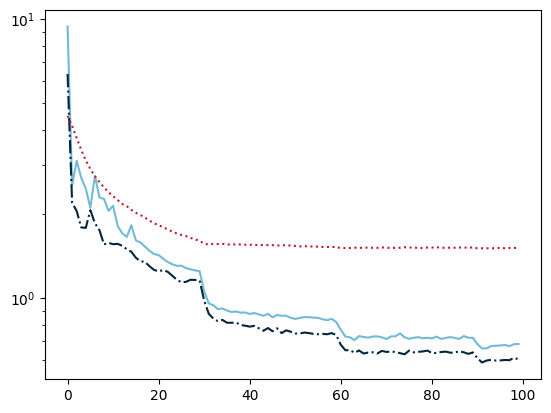

In [1]:
import matplotlib.pyplot as plt
import numpy as np

lstmfc = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/Meta-LSTMFC-Nonlinear-None-hidden-size-100-nlstm-1-dorefa-adam-1bits-lr-30-batchsize-100-05-16-00:01:26/loss.txt'

fsg = '/root/bqqi/fscil/MetaQuant/Results/ResNet56-CIFAR100/runs-Quant/MetaFastAndSlow-dorefa-adam-1bits-lr-30-batchsize-100-05-11-18:44:06/loss.txt'

ste = '/root/bqqi/fscil/MetaQuant/resnet56-sgd-loss.log'

def read_ste_log(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
    loss_data = []
    for line in lines:
        line = line.strip()
        loss_data.append(float(line))
        
    num_intervals = 100
    interval = len(loss_data) // num_intervals
    averages = []
    
    for i in range(num_intervals):
        start = i * interval
        end = start + interval
        interval_data = loss_data[start:end]
        average = sum(interval_data) / interval
        std = np.std(interval_data)
        averages.append(average)
    
    iterations = range(num_intervals)
    return iterations, averages

def loss_data_pick(filename):
    
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 解析损失值数据
    loss_data = []
    for line in lines:
        line = line.strip()  # 去除首尾空格和换行符
        if line:
            iteration, loss = line.split(', ')
            # loss_data.append((int(iteration), float(loss)))
            loss_data.append(float(loss))

    # 提取迭代次数和损失值
    # iterations = [data[0] for data in loss_data]
    # loss_values = [data[1] for data in loss_data]
    num_intervals = 100
    interval = len(loss_data) // num_intervals
    averages = []
    
    for i in range(num_intervals):
        start = i * interval
        end = start + interval
        interval_data = loss_data[start:end]
        average = sum(interval_data) / interval
        std = np.std(interval_data)
        averages.append(average)
    
    iterations = range(num_intervals)
    return iterations, averages

def count_std(data, window_size):
    interval = window_size
    stds = []
    start = 0
    end = interval
    while end < len(data):
        interval_data = data[start:end]
        std = np.std(interval_data)
        stds.append(std)
        start += 1
        end = start + interval
        
    return stds

epoch_lstmfc, loss_lstmfc = loss_data_pick(lstmfc)
epoch_fsg, loss_fsg = loss_data_pick(fsg)
epoch_ste, loss_ste = read_ste_log(ste)

# std_epoch_lstmfc = count_std(loss_lstmfc, 25)
# std_epoch_fsg = count_std(loss_fsg, 25)

plt.semilogy(epoch_lstmfc, loss_lstmfc, label='LSTMFC', color=(115/255,186/255,214/255),linestyle='-')
plt.semilogy(epoch_fsg, loss_fsg, label='FSG', color=(2/255,38/255,62/255),linestyle='-.')
plt.semilogy(epoch_ste, loss_ste, label='STE',color=(191/255,30/255,46/255),linestyle=':')

plt.show()
